# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')



In [2]:
#tratamento de dados ausentes
df = pd.read_csv('previsao_de_renda.csv')
print("\nDADOS AUSENTES")
print(df.isnull().sum())

df.dropna(subset=['tempo_emprego'],inplace=True)
df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print("\n")
df.drop(['Unnamed: 0','data_ref','id_cliente'],axis = 1,inplace=True)
print("\nAPÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES")
df.info()


DADOS AUSENTES
Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64



APÓS TRATAMENTO DE DADOS DUPLICADOS E AUSENTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12427 entries, 0 to 12426
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.


### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [3]:
train, test = train_test_split(df, test_size=0.25, random_state=2360873)
print("Base Treino")
print(train.shape)
print("\nBase Teste")
print(test.shape)
test.head(2)

Base Treino
(9320, 12)

Base Teste
(3107, 12)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
10241,F,False,True,0,Assalariado,Secundário,Separado,Casa,50,4.202740,1.0,2451.86
238,F,False,True,3,Empresário,Superior incompleto,Casado,Casa,33,6.046575,5.0,7725.87


### 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

L1_wt : If 0, the fit is a ridge fit, if 1 it is a lasso fit.

In [4]:
a = float(input('Informe o alpha desejado para a regularização ridge: '))
modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
md_ridge = smf.ols(modelo, data = test)
reg_ridge = md_ridge.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.0000000000001 
                         , alpha = a)

with open('ridge_alpha'+str(a)+'.txt', 'w',encoding='utf-8') as fh:
    fh.write(reg_ridge.summary().as_text())

with open('ridge_alpha'+str(a)+'.csv', 'w',encoding='latin-1') as fh:
    fh.write(reg_ridge.summary().as_csv())    
reg_ridge.summary()

Informe o alpha desejado para a regularização ridge: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     47.73
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          1.42e-197
Time:                        15:14:59   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.363e+04
Df Residuals:                    3082   BIC:                         6.378e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3396.7086   5067.135      0.670      0.503   -6538.596    1.33e+04
sexo[T.M]                         5547.1595    275.358     20.145      0.000    5007.255    6087.064
posse_de_veiculo[T.True]           162.5177    264.782      0.614      0.539    -356.650     681.685
posse_de_imovel[T.True]            423.7963    262.189      1.616      0.106     -90.287     937.879
tipo_renda[T.Bolsista]            -864.0956   3031.806     -0.285      0.776   -6808.661    5080.470
tipo_renda[T.Empresário]           922.5801    277.599      3.323      0.001     378.282    1466.878
tipo_renda[T.Pensionista]        -3968.9622   4784.624     -0.830      0.407   -1.34e+04    5412.413
tipo_renda[T.Servidor público]     336.9727    419.811      0.803      0.422    -486.165    1160.111
educacao[T.Pós graduação]          405.1512   3625.105      0.112      0.911   -6702.715    7513.017
educacao[T.Secundário]            -511.2466   1315.687     -0.389      0.698   -3090.960    2068.466
educacao[T.Superior completo]      491.4851   1322.156      0.372      0.710   -2100.911    3083.881
educacao[T.Superior incompleto]   -385.1544   1432.433     -0.269      0.788   -3193.774    2423.465
estado_civil[T.Separado]         -2575.6470   2448.823     -1.052      0.293   -7377.137    2225.843
estado_civil[T.Solteiro]         -2706.4645   2394.696     -1.130      0.258   -7401.827    1988.898
estado_civil[T.União]             -744.8814    468.770     -1.589      0.112   -1664.014     174.251
estado_civil[T.Viúvo]            -2213.3336   2502.346     -0.885      0.376   -7119.768    2693.100
tipo_residencia[T.Casa]           -478.7797   1000.482     -0.479      0.632   -2440.459    1482.900
tipo_residencia[T.Com os pais]    -746.6954   1118.674     -0.667      0.505   -2940.118    1446.728
tipo_residencia[T.Comunitário]    -114.5267   2592.280     -0.044      0.965   -5197.298    4968.244
tipo_residencia[T.Estúdio]       -1026.1484   1783.541     -0.575      0.565   -4523.198    2470.901
tipo_residencia[T.Governamental]  -854.5242   1200.333     -0.712      0.477   -3208.059    1499.010
qtd_filhos                        2846.5474   2401.251      1.185      0.236   -1861.668    7554.762
idade                               37.1195     14.931      2.486      0.013       7.843      66.396
tempo_emprego                      518.9151     19.406     26.740      0.000     480.865     556.965
qt_pessoas_residencia            -2529.1212   2393.809     -1.057      0.291   -7222.745    2164.502
==============================================================================
Omnibus:                     3283.798   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340418.675
Skew:             

### 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [5]:
# alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
a = float(input('Informe o alpha desejado para a regularização Lasso: '))
modelo = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
md_lasso = smf.ols(modelo, data = test)
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = a)


with open('lasso_alpha'+str(a)+'.txt', 'w',encoding='utf-8') as fh:
    fh.write(reg_lasso.summary().as_text())
    
with open('lasso_alpha'+str(a)+'.csv', 'w',encoding='latin-1') as fh:
    fh.write(reg_lasso.summary().as_csv())        
reg_lasso.summary()

Informe o alpha desejado para a regularização Lasso: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     47.73
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          1.42e-197
Time:                        15:15:04   Log-Likelihood:                -31787.
No. Observations:                3107   AIC:                         6.363e+04
Df Residuals:                    3082   BIC:                         6.378e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3396.7086   5067.135      0.670      0.503   -6538.596    1.33e+04
sexo[T.M]                         5547.1595    275.358     20.145      0.000    5007.255    6087.064
posse_de_veiculo[T.True]           162.5177    264.782      0.614      0.539    -356.650     681.685
posse_de_imovel[T.True]            423.7963    262.189      1.616      0.106     -90.287     937.879
tipo_renda[T.Bolsista]            -864.0956   3031.806     -0.285      0.776   -6808.661    5080.470
tipo_renda[T.Empresário]           922.5801    277.599      3.323      0.001     378.282    1466.878
tipo_renda[T.Pensionista]        -3968.9622   4784.624     -0.830      0.407   -1.34e+04    5412.413
tipo_renda[T.Servidor público]     336.9727    419.811      0.803      0.422    -486.165    1160.111
educacao[T.Pós graduação]          405.1512   3625.105      0.112      0.911   -6702.715    7513.017
educacao[T.Secundário]            -511.2466   1315.687     -0.389      0.698   -3090.960    2068.466
educacao[T.Superior completo]      491.4851   1322.156      0.372      0.710   -2100.911    3083.881
educacao[T.Superior incompleto]   -385.1544   1432.433     -0.269      0.788   -3193.774    2423.465
estado_civil[T.Separado]         -2575.6470   2448.823     -1.052      0.293   -7377.137    2225.843
estado_civil[T.Solteiro]         -2706.4645   2394.696     -1.130      0.258   -7401.827    1988.898
estado_civil[T.União]             -744.8814    468.770     -1.589      0.112   -1664.014     174.251
estado_civil[T.Viúvo]            -2213.3336   2502.346     -0.885      0.376   -7119.768    2693.100
tipo_residencia[T.Casa]           -478.7797   1000.482     -0.479      0.632   -2440.459    1482.900
tipo_residencia[T.Com os pais]    -746.6954   1118.674     -0.667      0.505   -2940.118    1446.728
tipo_residencia[T.Comunitário]    -114.5267   2592.280     -0.044      0.965   -5197.298    4968.244
tipo_residencia[T.Estúdio]       -1026.1484   1783.541     -0.575      0.565   -4523.198    2470.901
tipo_residencia[T.Governamental]  -854.5242   1200.333     -0.712      0.477   -3208.059    1499.010
qtd_filhos                        2846.5474   2401.251      1.185      0.236   -1861.668    7554.762
idade                               37.1195     14.931      2.486      0.013       7.843      66.396
tempo_emprego                      518.9151     19.406     26.740      0.000     480.865     556.965
qt_pessoas_residencia            -2529.1212   2393.809     -1.057      0.291   -7222.745    2164.502
==============================================================================
Omnibus:                     3283.798   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340418.675
Skew:             

### Conclusão
Conforme demonstrado abaixo, não foram verificadas alterações significativas no R², tanto a regularização Ridge quanto Lasso, mesmo utilizando-se alphas diferentes. 

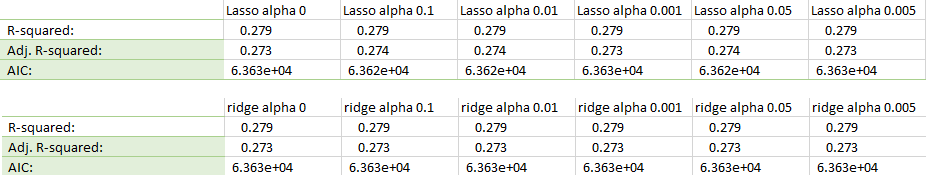

### 4. Rode um modelo *stepwise*. Avalie o $R^2$ na base de testes. Qual o melhor resultado?

In [6]:
X = test.copy()
X.drop(['renda'],axis = 1,inplace=True)
X.sexo = X.sexo.map({'F': 1, 'M':0})
X = pd.get_dummies(X, columns=['posse_de_veiculo','educacao','posse_de_imovel','tipo_renda','estado_civil','tipo_residencia'], drop_first=True)
print(X.shape)
y=np.array(test['renda'].values)
print(y.shape)
np.sort(y)

(3107, 24)
(3107,)


array([   249.14,    307.48,    366.33, ...,  94089.21, 102641.07,
       121348.3 ])

In [7]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("-"*60)
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('\nresulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 4.40265e-120
------------------------------------------------------------
['tempo_emprego']
Add  sexo                           with p-value 1.62931e-94
------------------------------------------------------------
['tempo_emprego', 'sexo']
Add  educacao_Superior completo     with p-value 3.54514e-05
------------------------------------------------------------
['tempo_emprego', 'sexo', 'educacao_Superior completo']
Add  tipo_renda_Empresário          with p-value 0.00262125
------------------------------------------------------------
['tempo_emprego', 'sexo', 'educacao_Superior completo', 'tipo_renda_Empresário']
------------------------------------------------------------
['tempo_emprego', 'sexo', 'educacao_Superior completo', 'tipo_renda_Empresário']

resulting features:
['tempo_emprego', 'sexo', 'educacao_Superior completo', 'tipo_renda_Empresário']


In [8]:
reg_stepwise = sm.OLS(y, sm.add_constant(pd.DataFrame(X[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     292.9
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          6.70e-214
Time:                        15:15:17   Log-Likelihood:                -31797.
No. Observations:                3107   AIC:                         6.360e+04
Df Residuals:                    3102   BIC:                         6.363e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       4777.0563    256.575     18.619      0.000    4273.983    5280.130
tempo_emprego                532.4872     18.218     29.229      0.000     496.767     568.207
sexo                       -5527.6570    253.762    -21.783      0.000   -6025.216   -5030.098
educacao_Superior completo  1000.8330    251.804      3.975      0.000     507.114    1494.552
tipo_renda_Empresário        812.5697    269.829      3.011      0.003     283.508    1341.632
==============================================================================
Omnibus:                     3282.483   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340463.863
Skew:                           5.090   Prob(JB):                         0.00
Kurtosis:                      53.262   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?

### Conclusão
A regularização $stepwise$ apresentou um resultado um pouco inferiror às anteriores com um R² de 0.274.

Por conseguinte, tanto na regularização $Ridge$ quanto $Lasso$ não foram verificadas alterações significativas no R², considerando ambos como sendo o melhor modelo a ser adotado.

### 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [9]:
# utilizando código do item 3 com alpha = 0 e log(renda)
a = float(input('Informe o alpha desejado para a regularização Lasso: '))
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'
md_lasso = smf.ols(modelo, data = test)
reg_lasso = md_lasso.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = a)


with open('lasso_alpha'+str(a)+'.txt', 'w',encoding='utf-8') as fh:
    fh.write(reg_lasso.summary().as_text())
    
with open('lasso_alpha'+str(a)+'.csv', 'w',encoding='latin-1') as fh:
    fh.write(reg_lasso.summary().as_csv())        
reg_lasso.summary()

Informe o alpha desejado para a regularização Lasso: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     68.05
Date:                Wed, 29 Jun 2022   Prob (F-statistic):          1.67e-271
Time:                        15:15:25   Log-Likelihood:                -3348.0
No. Observations:                3107   AIC:                             6748.
Df Residuals:                    3082   BIC:                             6905.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.6234      0.537     14.208      0.000       6.571       8.675
sexo[T.M]                            0.7388      0.029     25.339      0.000       0.682       0.796
posse_de_veiculo[T.True]             0.0599      0.028      2.137      0.033       0.005       0.115
posse_de_imovel[T.True]              0.0986      0.028      3.551      0.000       0.044       0.153
tipo_renda[T.Bolsista]               0.3198      0.321      0.996      0.319      -0.310       0.949
tipo_renda[T.Empresário]             0.1559      0.029      5.303      0.000       0.098       0.214
tipo_renda[T.Pensionista]           -0.3984      0.507     -0.786      0.432      -1.392       0.595
tipo_renda[T.Servidor público]       0.0647      0.044      1.455      0.146      -0.022       0.152
educacao[T.Pós graduação]           -0.0306      0.384     -0.080      0.936      -0.783       0.722
educacao[T.Secundário]              -0.1218      0.139     -0.875      0.382      -0.395       0.151
educacao[T.Superior completo]       -0.0395      0.140     -0.282      0.778      -0.314       0.235
educacao[T.Superior incompleto]     -0.1802      0.152     -1.188      0.235      -0.478       0.117
estado_civil[T.Separado]            -0.2445      0.259     -0.943      0.346      -0.753       0.264
estado_civil[T.Solteiro]            -0.2535      0.254     -1.000      0.318      -0.751       0.244
estado_civil[T.União]               -0.1057      0.050     -2.129      0.033      -0.203      -0.008
estado_civil[T.Viúvo]               -0.1157      0.265     -0.436      0.663      -0.635       0.404
tipo_residencia[T.Casa]              0.0992      0.106      0.936      0.349      -0.109       0.307
tipo_residencia[T.Com os pais]       0.1531      0.118      1.292      0.196      -0.079       0.385
tipo_residencia[T.Comunitário]       0.2362      0.275      0.860      0.390      -0.302       0.774
tipo_residencia[T.Estúdio]           0.1979      0.189      1.048      0.295      -0.172       0.568
tipo_residencia[T.Governamental]     0.0428      0.127      0.336      0.737      -0.206       0.292
qtd_filhos                           0.2787      0.254      1.096      0.273      -0.220       0.777
idade                                0.0054      0.002      3.442      0.001       0.002       0.009
tempo_emprego                        0.0624      0.002     30.344      0.000       0.058       0.066
qt_pessoas_residencia               -0.2467      0.253     -0.973      0.331      -0.744       0.250
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.093
Skew:             

In [10]:
# Selecinando as variáveis com p-value relevante
LR = reg_lasso.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']<0.05)]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.6234,0.537,14.208,0.000,6.571,8.675
sexo[T.M],0.7388,0.029,25.339,0.000,0.682,0.796
posse_de_veiculo[T.True],0.0599,0.028,2.137,0.033,0.005,0.115
posse_de_imovel[T.True],0.0986,0.028,3.551,0.000,0.044,0.153
tipo_renda[T.Empresário],0.1559,0.029,5.303,0.000,0.098,0.214
estado_civil[T.União],-0.1057,0.050,-2.129,0.033,-0.203,-0.008
idade,0.0054,0.002,3.442,0.001,0.002,0.009
tempo_emprego,0.0624,0.002,30.344,0.000,0.058,0.066


### Conclusão
De todas as simulações feitas, a que apresentou o melhor resultado do R² foi o log da variável "renda" na regularização Lasso com alpha = 0, conforme demonstrado abaixo:

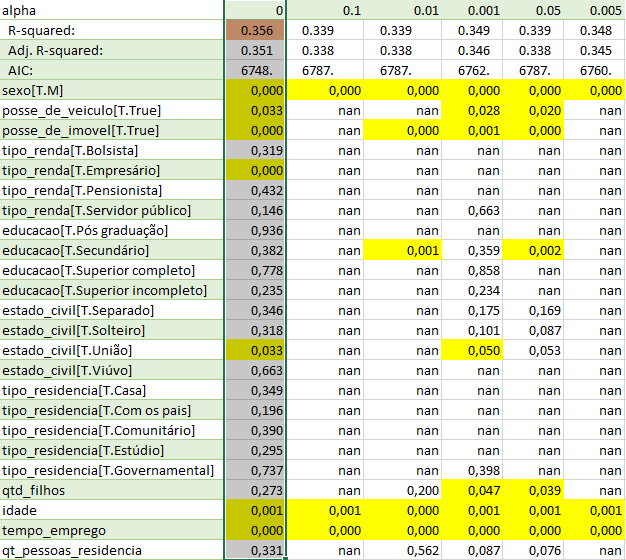

### 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [11]:
arv = df.copy()

# Regressão com log(renda)
#reg = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = arv).fit()
#Regressão com renda normal
reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = arv).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:15:38   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

#### Identificando as variáveis mais significantes

In [12]:
LR = reg.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
lr[(lr['P>|t|']<0.05)]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-5626.6247,2500.235,-2.250,0.024,-10500.000,-725.776
sexo[T.M],6052.8592,155.859,38.836,0.000,5747.352,6358.367
posse_de_imovel[T.True],366.5747,148.723,2.465,0.014,75.054,658.095
tipo_renda[T.Empresário],823.1460,158.826,5.183,0.000,511.822,1134.470
idade,42.0025,8.517,4.931,0.000,25.307,58.698
tempo_emprego,554.7551,11.044,50.230,0.000,533.107,576.404


In [13]:
# Regressão com log(renda)
#X = arv[[ 'sexo', 'posse_de_veiculo','posse_de_imovel','tipo_renda','estado_civil','idade','qtd_filhos','qt_pessoas_residencia','tempo_emprego']].copy()

# Regressão com renda normal
X = arv[[ 'sexo', 'posse_de_imovel','tipo_renda','idade','tempo_emprego']].copy()

X.head(5)

,sexo,posse_de_imovel,tipo_renda,idade,tempo_emprego
0,F,True,Empresário,26,6.602740
1,M,True,Assalariado,28,7.183562
2,F,True,Empresário,35,0.838356
3,F,True,Servidor público,30,4.846575
4,M,False,Assalariado,33,4.293151


### Criando dummies

In [14]:
X = pd.get_dummies(X, columns=['sexo','posse_de_imovel','tipo_renda'], drop_first=True)
X.head()

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público
0,26,6.602740,0,1,0,1,0,0
1,28,7.183562,1,1,0,0,0,0
2,35,0.838356,0,1,0,1,0,0
3,30,4.846575,0,1,0,0,0,1
4,33,4.293151,1,0,0,0,0,0


In [15]:
# Regressão com log(renda)
#y=np.array(np.log(arv['renda']).values)

# Regressão com renda normal
y=np.array(arv['renda'].values)
print("Shape de y --> ",y.shape)
print("Shape de X --> ",X.shape)
print("Var.Resp(y)--> ",len(y),(y))

Shape de y -->  (12427,)
Shape de X -->  (12427, 8)
Var.Resp(y)-->  12427 [8060.34 1852.15 2253.89 ...  604.82 3352.27 1160.99]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('\nX_test ',X_test.shape)
print('y_test ',y_test.shape)


X_train (9320, 8)
y_train (9320,)

X_test  (3107, 8)
y_test  (3107,)


### PRÉ-PODA DA ÁRVORE DE REGRESSÃO

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.242888,0.242888,0.242888,0.242888,0.242888,0.242888,0.242888,0.242888
3,0.351626,0.351626,0.351626,0.351626,0.351626,0.351626,0.351626,0.351626
4,0.380098,0.357138,0.357138,0.357138,0.357138,0.362545,0.361753,0.382182
5,0.376257,0.370036,0.353831,0.353828,0.354341,0.358568,0.359200,0.366348
6,0.398445,0.393719,0.360369,0.362854,0.367724,0.367542,0.378035,0.383652
7,0.430633,0.410688,0.374037,0.363270,0.369853,0.370786,0.391702,0.395745
8,0.429875,0.398660,0.386276,0.383731,0.391211,0.401089,0.409361,0.408662
9,0.452548,0.408913,0.393763,0.395858,0.398652,0.404375,0.417004,0.415955


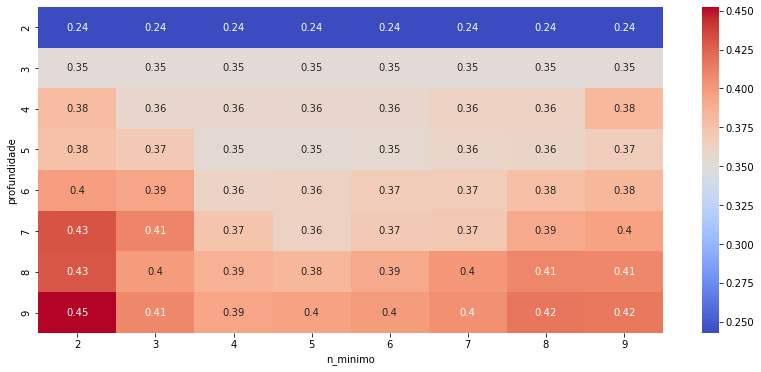

In [17]:
mses = []
ind_i = []
ind_j = []
plt.rc('figure', figsize=(14,6))
for i in range(2, 10):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',columns='n_minimo', values='mses'), cmap='coolwarm',annot=True)
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')


In [18]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=9,min_samples_leaf=2)
regr_2 = DecisionTreeRegressor(max_depth=6,min_samples_leaf=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

mse1 = regr_1.score(X_test, y_test)
mse2 = regr_2.score(X_test, y_test)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R² da árvore com profundidade=9 é: 0,46
O R² da árvore com profundidade=6 é: 0,39


#### Realizando a pós-poda

In [19]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
pd.DataFrame.from_dict(path)

,ccp_alphas,impurities
0,0.000000e+00,3.027124e+07
1,2.334155e-02,3.027124e+07
2,1.046794e+00,3.027124e+07
3,1.607437e+02,3.027140e+07
4,1.782051e+02,3.027158e+07
...,...,...
186,3.159551e+06,4.953599e+07
187,3.467707e+06,5.300369e+07
188,3.805344e+06,5.680904e+07
189,7.613161e+06,6.442220e+07


Text(0, 0.5, 'Impureza total das folhas')

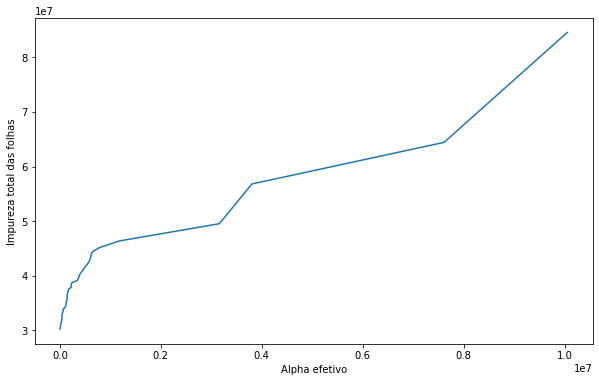

In [20]:
# Impureza da árvore em relação ao alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [21]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
#randon_state=2360873    

Text(0, 0.5, 'Profundidade da árvore')

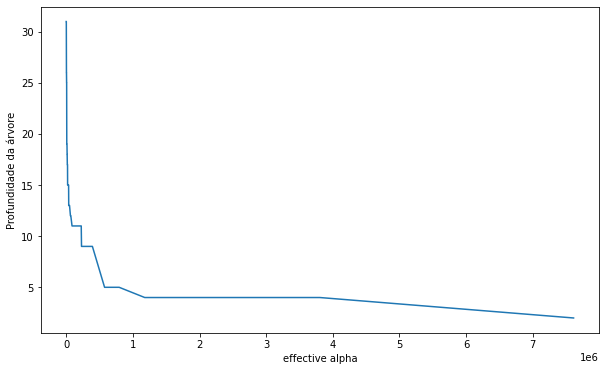

In [22]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

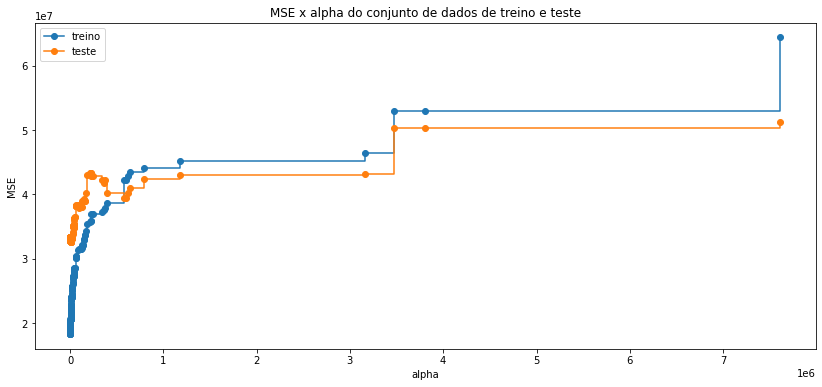

In [23]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [24]:
arvore_final = DecisionTreeRegressor(random_state=100, ccp_alpha=2)
arvore_final.fit(X_train,y_train)
print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R² na base de teste: {arvore_final.score(X_test,y_test):.2f}")
print(f"MSE na base de teste: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")                              

Profundidade: 30
R² na base de teste: 0.47
MSE na base de teste: 33419642.91


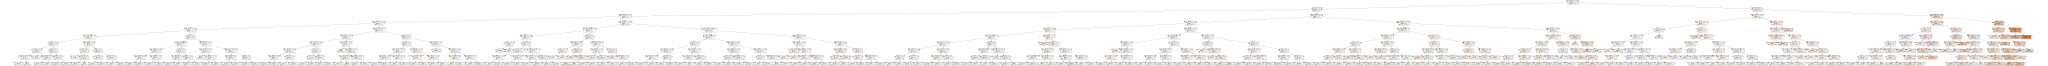

In [30]:
import graphviz
# DOT data

dot_data = tree.export_graphviz(regr_1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph